<a href="https://colab.research.google.com/github/guftgift/camel-order-management/blob/master/Gibbie_garmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# prompt: Convert Week to running number start from 1

from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Ann_activities.csv')
garmin_df = pd.DataFrame()
#df.info()
df['Activity Type'].describe()
df = df[['Start Time','Activity Type','Activity Name', 'Distance (km)','Calories','Average Heart Rate (bpm)','Avg. Run Cadence', 'Average Speed (km/h or min/km)', 'Max. Speed (km/h or min/km)', 'Stride Length', 'Elapsed Duration (h:m:s)']]

garmin_df['Date'] = pd.to_datetime(df['Start Time']).dt.strftime('%Y-%m-%d')
garmin_df['Week'] = pd.to_datetime(df['Start Time']) - pd.to_timedelta(7, unit='d')
garmin_df['Elapsed Time'] = pd.to_datetime(df['Elapsed Duration (h:m:s)'],format = '%H:%M:%S').dt.time
garmin_df['Activity'] = df['Activity Name'].str.split('-').str[1]
garmin_df['Type'] = garmin_df['Activity'].str[:4]
garmin_df['Elapsed Time'] = pd.to_datetime(df['Elapsed Duration (h:m:s)'], format='%H:%M:%S').dt.time  # Convert 'Elapsed Time' to datetime objects and extract time

garmin_df['Avg Pace'] = df['Average Speed (km/h or min/km)']
garmin_df['Best Pace'] = df['Max. Speed (km/h or min/km)']
garmin_df['HR']= df['Average Heart Rate (bpm)']
garmin_df['Cadence'] = df['Avg. Run Cadence']
garmin_df['Stride Length'] = df['Stride Length']
garmin_df['Distance'] = df['Distance (km)']

garmin_df = garmin_df[garmin_df['Activity'].notnull()]
garmin_df = garmin_df.sort_values(by=['Date','Activity'])

# Convert 'Week' to a running number starting from 1
garmin_df['Week'] = (pd.to_datetime(garmin_df['Date']) - pd.to_datetime(garmin_df['Date']).min()).dt.days // 7 + 1
garmin_df['Type'] = garmin_df['Type'].str.strip().str.upper()


filtered_df = garmin_df[garmin_df['Type'].isin(['MCR', 'ARR','SCR','FCR','VCR'])]

weekly_summary = filtered_df.groupby(['Week', 'Type'])['Distance'].sum().unstack(fill_value=0)
weekly_summary['Total'] = weekly_summary.sum(axis=1)
print(weekly_summary)




Type       ARR      FCR       MCR       SCR      VCR     Total
Week                                                          
1     10.34202  0.00000   8.79745  12.46264  0.00000  31.60211
2      8.64141  0.00000  17.61709  21.06165  0.00000  47.32015
3      3.64854  0.00000  17.94429  21.07981  0.00000  42.67264
4      7.20857  0.00000  15.10092   0.00000  3.00448  25.31397
5      9.24256  0.00000  18.48151  21.66228  0.00000  49.38635
6      9.28330  0.00000  18.56049  23.06963  0.00000  50.91342
7      0.00000  5.10938  16.15629  13.09063  0.00000  34.35630


In [ ]:
# prompt: Convert Week to running number start from 1

from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Ann_activities.csv')
garmin_df = pd.DataFrame()
#df.info()
df['Activity Type'].describe()
df = df[['Start Time','Activity Type','Activity Name', 'Distance (km)','Calories','Average Heart Rate (bpm)','Avg. Run Cadence', 'Average Speed (km/h or min/km)', 'Max. Speed (km/h or min/km)', 'Stride Length', 'Elapsed Duration (h:m:s)']]

garmin_df['Date'] = pd.to_datetime(df['Start Time']).dt.strftime('%Y-%m-%d')
garmin_df['Week'] = pd.to_datetime(df['Start Time']) - pd.to_timedelta(7, unit='d')
garmin_df['Elapsed Time'] = pd.to_datetime(df['Elapsed Duration (h:m:s)'],format = '%H:%M:%S').dt.time
garmin_df['Activity'] = df['Activity Name'].str.split('-').str[1]
garmin_df['Type'] = garmin_df['Activity'].str[:4]
garmin_df['Elapsed Time'] = pd.to_datetime(df['Elapsed Duration (h:m:s)'], format='%H:%M:%S').dt.time  # Convert 'Elapsed Time' to datetime objects and extract time

garmin_df['Avg Pace'] = df['Average Speed (km/h or min/km)']
garmin_df['Best Pace'] = df['Max. Speed (km/h or min/km)']
garmin_df['HR']= df['Average Heart Rate (bpm)']
garmin_df['Cadence'] = df['Avg. Run Cadence']
garmin_df['Stride Length'] = df['Stride Length']
garmin_df['Distance'] = df['Distance (km)']

garmin_df = garmin_df[garmin_df['Activity'].notnull()]
garmin_df = garmin_df.sort_values(by=['Date','Activity'])

# Convert 'Week' to a running number starting from 1
garmin_df['Week'] = (pd.to_datetime(garmin_df['Date']) - pd.to_datetime(garmin_df['Date']).min()).dt.days // 7 + 1
garmin_df['Type'] = garmin_df['Type'].str.strip().str.upper()


filtered_df = garmin_df[garmin_df['Type'].isin(['MCR', 'ARR','SCR','FCT','VCR'])]





In [ ]:
filtered_df

,Date,Week,Elapsed Time,Activity,Type,Avg Pace,Best Pace,HR,Cadence,Stride Length,Distance,Avg Pace (seconds/km),Avg Pace (sec/km)
64,2024-06-04,1,00:30:04,ARR30,ARR,08:42,07:40,130,172.17,66.72,3.45406,522,522
58,2024-06-08,1,01:00:03,ARR60,ARR,08:43,06:54,123,163.56,70.12,6.88796,523,523
54,2024-06-11,2,00:30:01,ARR30,ARR,08:41,07:21,129,172.05,66.90,3.45800,521,521
53,2024-06-12,2,01:00:01,mcr60,MCR,06:49,06:07,145,175.44,83.65,8.80859,409,409
50,2024-06-13,2,01:30:01,scr 90,SCR,07:10,06:24,137,174.09,80.13,12.55714,430,430
48,2024-06-14,2,01:00:07,mcr60,MCR,06:50,05:51,141,176.34,83.09,8.80850,410,410
47,2024-06-15,2,00:45:06,ARR45,ARR,08:42,06:57,117,168.94,68.06,5.18341,522,522
42,2024-06-16,2,01:00:29,scr 60,SCR,07:03,06:17,134,174.91,81.01,8.50451,423,423
38,2024-06-18,3,00:30:06,ARR30,ARR,08:15,06:17,126,172.53,70.24,3.64854,495,495
37,2024-06-19,3,01:00:30,mcr60,MCR,06:48,06:05,141,176.50,83.21,8.82637,408,408


In [ ]:
# prompt: List of  HR Group by First Level Type and Second Level is week

weekly_hr_summary = filtered_df.groupby(['Type', 'Week'])['HR'].mean().unstack(fill_value=0)
print(weekly_hr_summary)


Week      1      2      3      4      5      6      7
Type                                                 
ARR   126.5  123.0  126.0  119.0  124.0  124.0    0.0
MCR     0.0  143.0  144.0  150.5  151.0  145.5  153.0
SCR     0.0  135.5  138.5    0.0  146.0  142.5  142.0
VCR     0.0    0.0    0.0  156.0    0.0    0.0    0.0


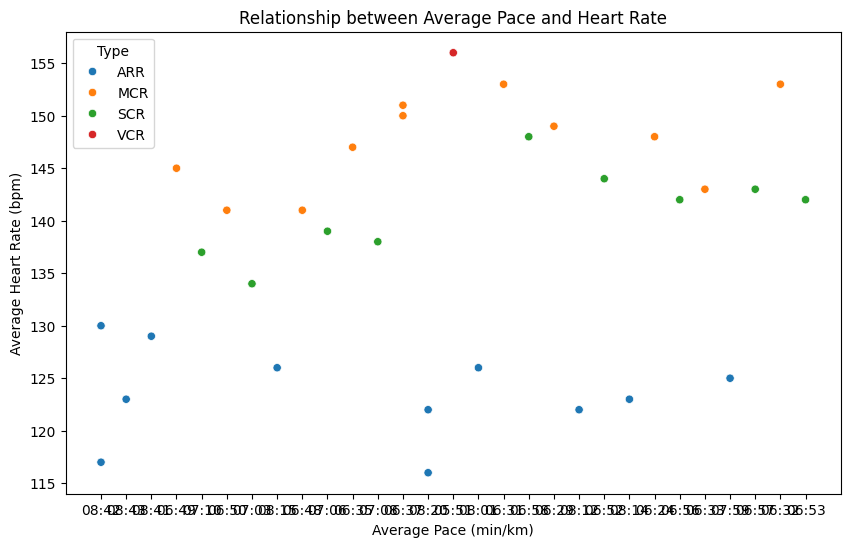

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# prompt: Find relationship of Pace and HR

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Avg Pace' is in minutes per kilometer (min/km)
# If it's in kilometers per hour (km/h), you may need to convert it

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Avg Pace', y='HR', hue='Type')
plt.title('Relationship between Average Pace and Heart Rate')
plt.xlabel('Average Pace (min/km)')
plt.ylabel('Average Heart Rate (bpm)')
plt.show()

# Calculate correlation coefficient
correlation = filtered_df['Avg Pace'].corr(filtered_df['HR'])
print(f"Correlation between Average Pace and Heart Rate: {correlation:.2f}")


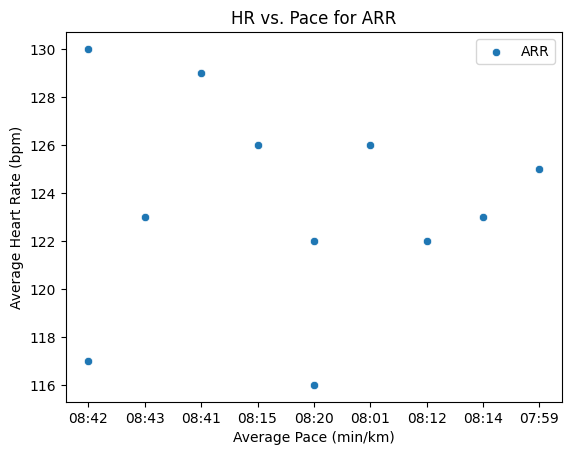

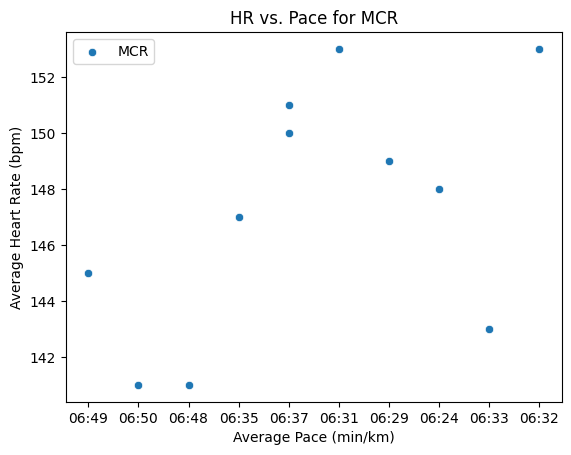

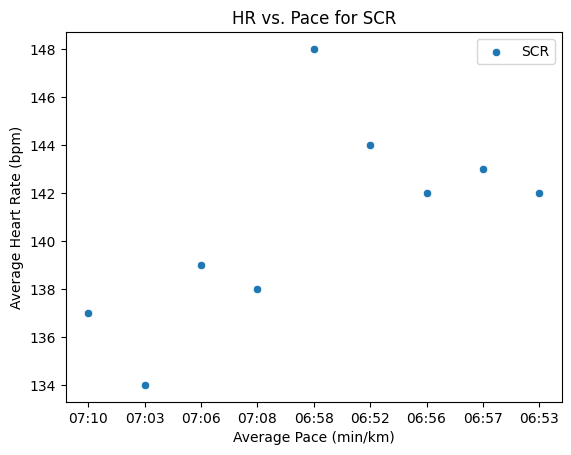

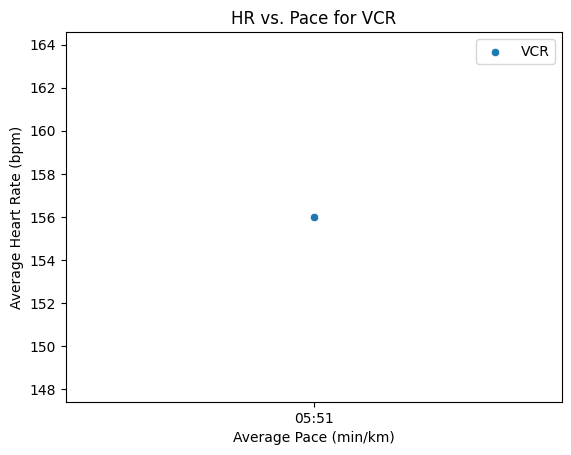

In [ ]:
# prompt: Find the relationship between HR and Pace(min/km) one color for one type

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Avg Pace' is in min/km format
# If it's in km/h, you'll need to convert it first

# Create a scatter plot for each activity type
for activity_type in filtered_df['Type'].unique():
  subset = filtered_df[filtered_df['Type'] == activity_type]
  plt.figure()  # Create a new figure for each activity type
  sns.scatterplot(x='Avg Pace', y='HR', data=subset, label=activity_type)
  plt.title(f"HR vs. Pace for {activity_type}")
  plt.xlabel("Average Pace (min/km)")
  plt.ylabel("Average Heart Rate (bpm)")
  plt.legend()
  plt.show()


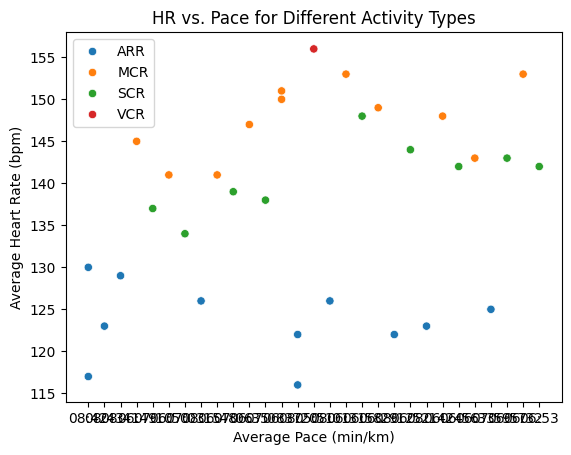

In [ ]:
# prompt: Combine into one graph difference color

# Assuming 'Avg Pace' is in min/km format
# If it's in km/h, you'll need to convert it first

# Create a single scatter plot with different colors for each activity type
plt.figure()
sns.scatterplot(x='Avg Pace', y='HR', hue='Type', data=filtered_df)
plt.title("HR vs. Pace for Different Activity Types")
plt.xlabel("Average Pace (min/km)")
plt.ylabel("Average Heart Rate (bpm)")
plt.legend()
plt.show()
